In [40]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

# Bird Dataset

In [260]:
data = pd.read_csv('bird.csv')
data = data.dropna()
X = data.drop(['id', 'type'], axis = 1)
Y = data.type
data.head()

413

In [85]:
label_to_num = []
for each, number in zip(Y.unique(), range(len(Y.unique()))):
    for label in Y.tolist():
        if each != label:
            pass
        else:
            label_to_num.append(number)

# Regular PCA + Explained Variance

In [86]:
import numpy as np
from sklearn.decomposition import PCA
pca_params = ['auto', 'full', 'arpack', 'randomized']
for param in pca_params:
    pca = PCA(svd_solver = param)
    pca.fit(X)  
print(Y.unique())

['SW' 'W' 'T' 'R' 'P' 'SO']


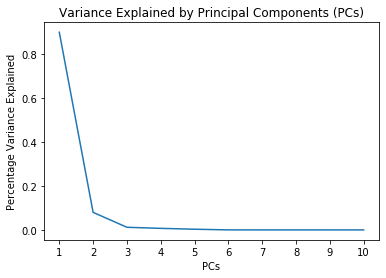

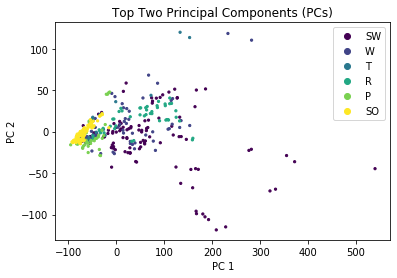

In [87]:
reduced_X = pca.transform(X)

plt.figure()
plt.xticks(np.arange(20), range(1, 20+1))
percent_explained_var = pca.explained_variance_/sum(pca.explained_variance_)
plt.plot(range(0,len(pca.explained_variance_)), percent_explained_var)
plt.title("Variance Explained by Principal Components (PCs)")
plt.xlabel("PCs")
plt.ylabel("Percentage Variance Explained")
plt.savefig('regular_PCA_scree.png')


plt.figure()
reduced_X = pca.transform(X)
label_to_num = np.asarray(label_to_num).reshape(-1,1)
flat_list = [item for sublist in label_to_num for item in sublist]
scatter = plt.scatter(reduced_X[:,0], reduced_X[:,1], c = flat_list, s = 5)
plt.title("Top Two Principal Components (PCs)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(handles= scatter.legend_elements()[0], labels=list(Y.unique()))

plt.savefig('regular_PCA.png')


In [88]:
df = pd.DataFrame(data = reduced_X[:,0:2], columns = ['PC1', 'PC2'])


# Kernel PCA + Variance Scree Plots

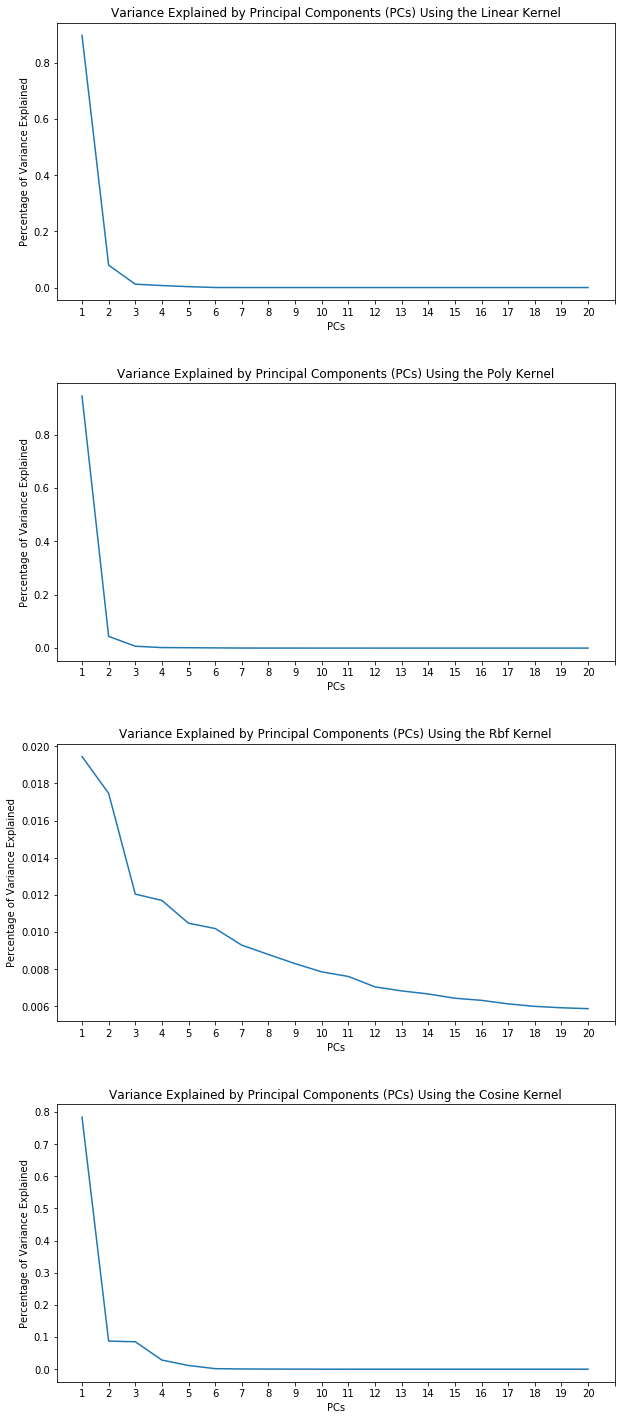

In [96]:
from sklearn.decomposition import KernelPCA

kernels = ['linear','poly','rbf','cosine']

PC_names = []
for num in range(10):
    joined = 'PC' + str(num + 1);
    PC_names.append(joined)
    

fig, axs = plt.subplots(4, 1)
fig.set_size_inches(10,25)
plt.subplots_adjust(hspace = .3, wspace = .1)
    
iteration = 0
for kernel in kernels:
    transformer = KernelPCA(kernel=kernel)
    X_reduced = transformer.fit_transform(X)
    top_eigenvals = transformer.lambdas_
    total_variance = sum(top_eigenvals)
    explained_var = top_eigenvals/total_variance
    axs[iteration].plot(explained_var[0:20])
    plt.xticks(np.arange(20), range(1, 20+1))

    axs[iteration].set_xlabel('PCs')
    axs[iteration].set_ylabel('Percentage of Variance Explained')
    title_str = 'Variance Explained by Principal Components (PCs) Using the ' + kernel.capitalize() + ' Kernel'
    axs[iteration].set_title(title_str)
    axs[iteration].set_xticks(np.arange(20 + 1))
    axs[iteration].set_xticklabels(range(1, 20 + 1),
                                   fontsize = 10)
    iteration += 1

    
plt.savefig('scree.png')
plt.show()



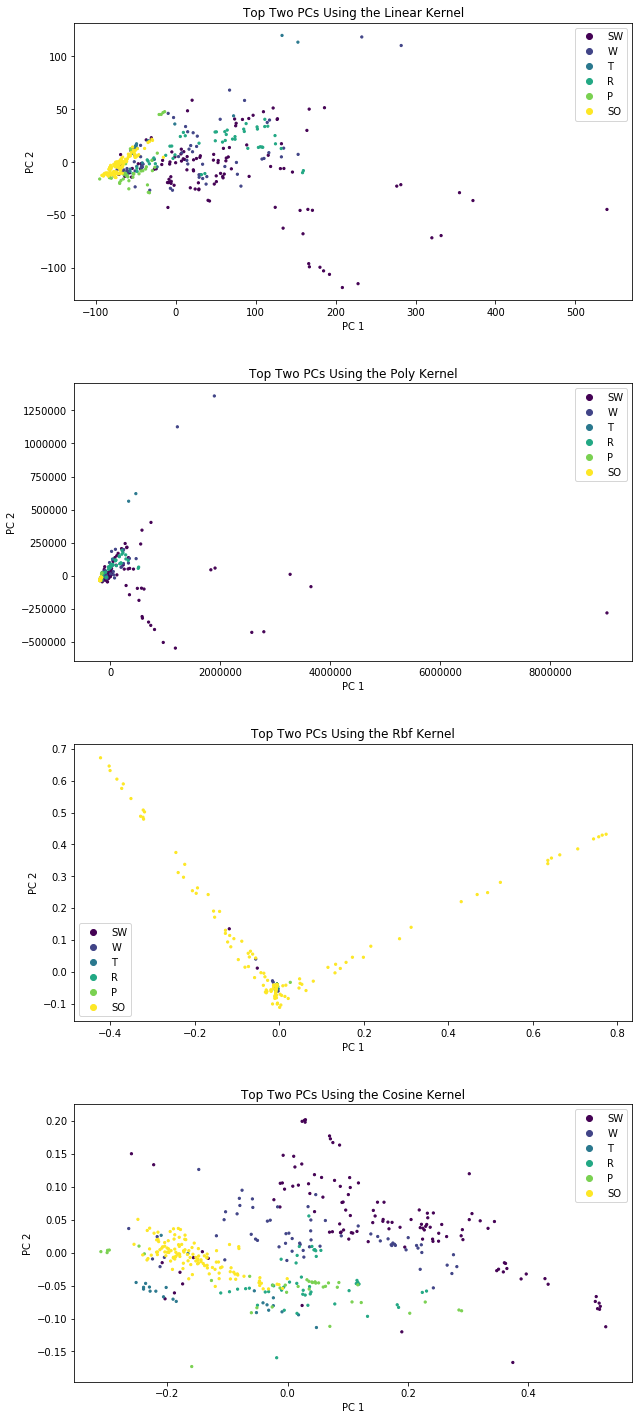

In [119]:
fig, axs = plt.subplots(4, 1)
fig.set_size_inches(10,25)
plt.subplots_adjust(hspace = .3, wspace = .1)
iteration = 0
for kernel in kernels:
    transformer = KernelPCA(kernel=kernel)
    X_reduced = transformer.fit_transform(X)
    scatter = axs[iteration].scatter(X_reduced[:,0], X_reduced[:,1], c = flat_list, s = 5)
    axs[iteration].set_xlabel('PC 1')
    axs[iteration].set_ylabel('PC 2')
    title_str = 'Top Two PCs Using the ' + kernel.capitalize() + ' Kernel'
    axs[iteration].set_title(title_str)
    axs[iteration].legend(handles= scatter.legend_elements()[0], labels=list(Y.unique()))
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    iteration += 1

save_str = "all_kernels.png"
plt.savefig(save_str)
fig.show()

# Does Scaling Make a Difference?

In [12]:
scaler = preprocessing.MinMaxScaler((-1,1))
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns = list(X))
scaled_df.head()


,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
0,-0.654127,-0.336527,-0.716016,-0.294545,-0.430255,-0.482726,-1.000000,-0.377953,-0.630090,-0.526433
1,-0.614483,-0.342515,-0.674242,-0.165455,-0.330863,-0.370682,-0.362729,-0.283465,-0.596603,-0.501117
2,-0.658076,-0.373653,-0.729499,-0.221818,-0.406309,-0.445378,-0.404264,-0.375984,-0.634755,-0.600894
3,-0.669389,-0.453892,-0.746660,-0.314545,-0.463892,-0.516340,-0.456972,-0.501969,-0.665012,-0.590469
4,-0.741802,-0.556886,-0.813684,-0.503636,-0.579628,-0.665733,-0.566994,-0.588583,-0.711655,-0.632167


# VIF for Multicollinearinty

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#new_X = add_constant(scaled_df)
VIF = list(pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index = X.columns))
for each in VIF:
    print("%.3f" % each)


149.239
100.165
99.930
43.574
64.239
155.368
88.077
121.871
51.522
22.822


Mean correlation for each variable:
 huml     0.854572
humw     0.886992
ulnal    0.831613
ulnaw    0.861648
feml     0.863907
femw     0.897520
tibl     0.852053
tibw     0.893161
tarl     0.762288
tarw     0.821462
dtype: float64


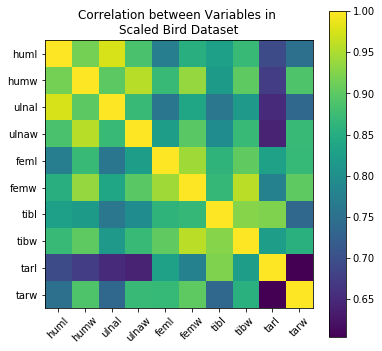

In [150]:


correlation_df = pd.DataFrame(X.corr())
fig_cor, axes_cor = plt.subplots(1,1)
fig_cor.set_size_inches(6, 6)
labels = list(scaled_df)
myimage = axes_cor.imshow(correlation_df)
plt.colorbar(myimage)
plt.draw()
axes_cor.set_xticks(np.arange(0,correlation_df.shape[0], correlation_df.shape[0]*1.0/len(labels)))
axes_cor.set_yticks(np.arange(0,correlation_df.shape[1], correlation_df.shape[1]*1.0/len(labels)))
axes_cor.set_xticklabels(labels)
axes_cor.set_yticklabels(labels)
plt.xticks(rotation=45)
plt.title("Correlation between Variables in \nScaled Bird Dataset")
plt.savefig('correlation.png')

plt.draw()


mean_correlation = np.mean(correlation_df)
print("Mean correlation for each variable:\n", mean_correlation)


# Throwing out Redundant Variables

In [200]:
X = data.drop(['id', 'type'], axis = 1)
Y = data.type

kept_vars = []
for variable, correlation in zip(list(X), VIF):
    if correlation < 80:
        kept_vars.append(variable)
        


In [201]:

new_vars = kept_vars
print(new_vars)

['ulnaw', 'feml', 'tarl', 'tarw']


# Logistic Regression

In [202]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = data.drop(['id', 'type'], axis = 1)
Y = data.type

In [203]:
# Without PCA, all vars
score = 0
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, shuffle = True)
    logit = LogisticRegression(random_state=0).fit(X_train, y_train)
    new_score = logit.score(X_test, y_test)
    score = score + new_score
fin_score = score/10
print("%.3f" % fin_score)

0.863


In [204]:
# With 4 variables

score = 0
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X[new_vars], Y, test_size = 0.33, shuffle = True)

    logit = LogisticRegression().fit(X_train, y_train)
    new_score = logit.score(X_test, y_test)
    score = score + new_score
fin_score = score/10
print("%.3f" % fin_score)

0.661


In [205]:
# with regular pca and ALL vars

pca = PCA()
pca_X = pca.fit_transform(X)  

score = 0
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(pca_X[:,0:4], Y, test_size = 0.33, shuffle = True)

    logit = LogisticRegression().fit(X_train, y_train)
    new_score = logit.score(X_test, y_test)
    score = score + new_score
fin_score = score/10
print("%.3f" % fin_score)

0.651


In [215]:
# with regular pca and reduced vars
X = data.drop(['id', 'type'], axis = 1)
Y = data.type
X = X[new_vars]
pca = PCA()
reduced_pca_X = pca.fit_transform(reduced_X)  

score = 0
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(reduced_pca_X[:,0:3], Y, test_size = 0.33, shuffle = True)

    logit = LogisticRegression().fit(X_train, y_train)
    new_score = logit.score(X_test, y_test)
    score = score + new_score
fin_score = score/10
print("%.3f" % fin_score)

0.626


In [254]:
# With kernel (cosine) PCA
X = data.drop(['id', 'type'], axis = 1)
Y = data.type
X = X[new_vars]

transformer = KernelPCA(kernel="cosine")
X_reduced_PCA = transformer.fit_transform(X)
X_reduced_PCA = X_reduced_PCA[:,0:3]

X = X_scaled_PCA
Y = flat_list
X_train, X_test, y_train, y_test = train_test_split(X_reduced_PCA, Y, test_size = 0.33, shuffle = True)

logit = LogisticRegression().fit(X_train, y_train)
logit.score(X_test, y_test)

0.3284671532846715

# KNN

In [134]:
# regular pca
from sklearn.neighbors import KNeighborsClassifier

num_neighbors = [1,2,3,4,5,6,7,8]
for neighbor in num_neighbors:
    score = 0
    for trials in range(10):
        X = data.drop(['id', 'type'], axis = 1)
        Y = data.type
        pca = PCA(n_components = 2)
        X_pca = pca.fit_transform(X)  
        X_pca = pd.DataFrame(X_pca[:,0:2], columns = ["PC1", "PC2"])
        #plt.scatter(X_pca.PC1, X_pca.PC2, c = flat_list, s = 3)
        X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size = 0.33, random_state = 42, shuffle = True)
        knn = KNeighborsClassifier(n_neighbors=neighbor)
        knn.fit(X_train, y_train)
        new_score = knn.score(X_test, y_test)
        score = new_score + score
    fin_score = score/10
    statement = "KNN with " + str(neighbor) + " neighbors gives a classification accuracy of " + str(fin_score)
    print("%.3f" % fin_score)
    #print(statement)
    
    

0.628
0.613
0.635
0.599
0.606
0.620
0.599
0.606


In [130]:
#no pca at al

from sklearn.neighbors import KNeighborsClassifier

num_neighbors = [1,2,3,4,5,6,7,8]
for neighbor in num_neighbors:
    score = 0
    for trials in range(10):
        X = data.drop(['id', 'type'], axis = 1)
        Y = data.type
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42, shuffle = True)
        knn = KNeighborsClassifier(n_neighbors=neighbor)
        knn.fit(X_train, y_train)
        new_score = knn.score(X_test, y_test)
        score = new_score + score
    fin_score = score/10
    statement = "KNN with " + str(neighbor) + " neighbors gives a classification accuracy of " + str(fin_score)
    print("%.3f" % fin_score)
    #print(statement)
    
    

0.781
0.774
0.737
0.737
0.723
0.715
0.701
0.701


In [143]:
from sklearn.neighbors import KNeighborsClassifier
X = data.drop(['id', 'type'], axis = 1)
Y = data.type

for neighbor in num_neighbors:
    score = 0
    for trials in range(10):
        
        cos_transformer = KernelPCA(kernel="cosine")
        X_reduced = cos_transformer.fit_transform(X)
        X_pca = pd.DataFrame(X_reduced[:,0:2], columns = ["PC1", "PC2"])
        X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size = 0.33, random_state = 42, shuffle = True)
        knn = KNeighborsClassifier(n_neighbors=neighbor)
        knn.fit(X_train, y_train)
        new_score = knn.score(X_test, y_test)
        score = new_score + score
    fin_score = score/10
    statement = "KNN with " + str(neighbor) + " neighbors gives a classification accuracy of " + str(fin_score)
    print("%.3f" % fin_score)



0.708
0.715
0.745
0.752
0.766
0.781
0.759
0.796


In [36]:
from sklearn.mixture import GaussianMixture

X = data.drop(['id', 'type'], axis = 1)
Y = flat_list
cos_transformer = KernelPCA(kernel="cosine")
X_reduced = cos_transformer.fit_transform(X)
X_pca = pd.DataFrame(X_reduced[:,0:2], columns = ["PC1", "PC2"])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, shuffle = True)
mog = GaussianMixture(n_components = 6)
mog.fit(X_train, y_train)
predicted_labels = mog.predict(X_test)

num_correct = 0
for predicted, true in zip(predicted_labels, y_test):
    if predicted == true:
        num_correct += 1
        
test_score = num_correct/len(y_test)
print(test_score)
print(predicted_labels, y_test)

        
        
        
        
        

0.08759124087591241
[1 5 1 2 1 2 1 0 2 2 1 2 5 1 1 1 2 2 2 2 1 2 1 1 2 1 1 1 5 1 1 1 1 5 2 2 1
 2 1 5 1 2 5 0 1 5 1 5 1 1 1 1 2 2 1 2 1 2 1 2 1 2 1 5 1 1 1 2 1 1 2 2 1 1
 2 1 5 1 5 1 2 2 2 1 5 1 5 1 2 2 0 2 1 1 5 5 1 5 1 2 2 1 1 1 2 1 1 1 2 2 1
 2 1 5 1 2 1 2 2 5 5 1 1 1 2 1 2 1 2 2 2 2 1 1 1 2 2] [5, 0, 5, 0, 4, 0, 5, 0, 1, 3, 5, 3, 3, 5, 2, 5, 2, 0, 1, 1, 5, 0, 5, 4, 0, 1, 5, 5, 0, 0, 5, 5, 4, 2, 1, 0, 5, 0, 5, 0, 5, 1, 3, 0, 5, 0, 5, 3, 2, 5, 4, 5, 0, 0, 2, 1, 5, 0, 5, 4, 5, 0, 5, 3, 2, 1, 4, 0, 5, 5, 0, 4, 5, 5, 0, 5, 3, 4, 0, 5, 4, 1, 0, 5, 3, 1, 1, 5, 0, 1, 0, 3, 5, 5, 3, 3, 5, 0, 4, 0, 2, 2, 1, 1, 0, 3, 5, 1, 0, 4, 5, 3, 0, 3, 5, 0, 4, 1, 1, 3, 3, 1, 5, 5, 0, 5, 0, 5, 1, 0, 1, 0, 5, 0, 5, 0, 0]


# To-do:
### MOG
    #### - if MOG turns out well, generate some data from each distribution!
### K-NN - done?
### Logistic regression - done?

In [ ]:
X_pca['label'] = Y
X_pca_1 = X_pca[X_pca['label'] <= 2]
X_pca_2 = X_pca[X_pca['label'] >= 3]

In [ ]:
#plt.scatter(X_pca_2.PC1, X_pca_2.PC2, c = X_pca_2.label, s=3)
cos_transformer = KernelPCA(kernel="cosine")
X_reduced = cos_transformer.fit_transform(X_pca_1)
X_pca = pd.DataFrame(X_reduced[:,0:2], columns = ["PC1", "PC2"])

X_train, X_test, y_train, y_test = train_test_split(X_pca, X_pca_1.label, test_size = 0.33, shuffle = True)
mog = GaussianMixture(n_components = 3, max_iter = 200, warm_start = True)
mog.fit(X_train, y_train)
predicted_labels = mog.predict(X_test)
params = mog.get_params()

num_correct = 0
for predicted, true in zip(predicted_labels, y_test):
    if (predicted) == true:
        num_correct += 1
        
test_score = num_correct/len(y_test)
print(test_score)
#print(predicted_labels)
#print(y_test)

# Ridge Regression

In [258]:
from sklearn.linear_model import RidgeClassifierCV
from scipy.stats import mode

X = data.drop(['id', 'type'], axis = 1)
Y = flat_list

alphas = []
score = 0
for i in range(10):
    X = data.drop(['id', 'type'], axis = 1)
    Y = flat_list
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, shuffle = True)

    ridge_CV = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], store_cv_values = True).fit(X_train, y_train)
    score = ridge_CV.score(X_test, y_test) + score
    alphas.append(ridge_CV.alpha_)
fin_score = score/10
print(fin_score)
print(mode(alphas))



0.672992700729927
ModeResult(mode=array([10.]), count=array([8]))


In [241]:
from sklearn.cluster import SpectralClustering
import numpy as np

X = data.drop(['id', 'type'], axis = 1)
Y = flat_list
transformer = KernelPCA(kernel='cosine')
X_reduced = transformer.fit_transform(X)


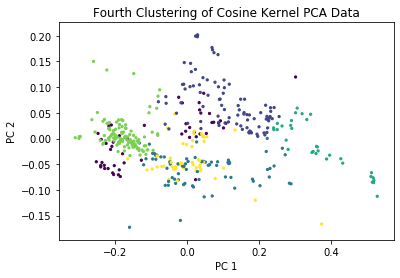

In [252]:

times = ['First', "Second", "Third", "Fourth"]
for each in times:
    plt.clf()
    spectral = SpectralClustering(n_clusters=6, n_init = 10, assign_labels="discretize").fit(X_reduced[:,0:2])
    title_str = each + " Clustering of Cosine Kernel PCA Data"
    plt.title(title_str)
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    scatter = plt.scatter(X_reduced[:,0], X_reduced[:,1], c = spectral.fit_predict(X_reduced), s = 5)
    save_str = each + ".png"
    plt.savefig(save_str)